In [112]:
import numpy as np
import copy
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


In [113]:
np.random.seed(1)
data=pd.read_csv(r"rainfall_data.csv")

In [114]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data=pd.read_csv(r"rainfall_data.csv")

# create decision tree for target variable
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# discretize target variable using decision tree
data['rainfall_tree'] = pd.cut(data['rainfall'], bins=6, labels=False)
tree.fit(data[['rainfall']], data['rainfall_tree'])
data['rainfall_tree'] = tree.predict(data[['rainfall']])

# create new columns for the discretized data
data['windspeed_tree'] = tree.predict(pd.cut(data['windspeed'], bins=6, labels=False).values.reshape(-1,1))
data['tpw_tree'] = tree.predict(pd.cut(data['tpw'], bins=6, labels=False).values.reshape(-1,1))

print(data)

           date  windspeed       tpw   rainfall  rainfall_tree  \
0      6/1/2000  12.245595  0.033285   4.688589              0   
1      6/2/2000  12.825491  0.044874  11.330589              0   
2      6/3/2000  12.921664  0.010243   6.894713              0   
3      6/4/2000  15.149001  0.036881   4.613324              0   
4      6/5/2000  18.495907  0.139491   8.111635              0   
...         ...        ...       ...        ...            ...   
2557  9/26/2020   5.577215  0.009963   4.467977              0   
2558  9/27/2020   5.184293  0.002341   1.572182              0   
2559  9/28/2020   4.469007  0.000867   1.819019              0   
2560  9/29/2020   4.259090  0.001416   2.198017              0   
2561  9/30/2020   5.513838  0.002474  12.713634              0   

      windspeed_tree  tpw_tree  
0                  0         0  
1                  0         0  
2                  0         0  
3                  0         0  
4                  0         0  
...      

C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [117]:
extreme_data=data[data["rainfall"]>30]
normal_data=data[data["rainfall"]<=30]

In [85]:
extreme_data

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree
41,7/12/2000,23.003010,0.016358,33.846075,2,0,0
552,8/4/2004,21.769238,0.043448,44.404364,3,0,0
876,6/23/2007,23.908970,0.331606,49.356381,3,0,0
900,7/17/2007,19.211468,0.030241,32.941690,2,0,0
920,8/6/2007,17.366877,0.022628,31.609187,2,0,0
1033,7/28/2008,20.585272,0.014900,32.559895,2,0,0
1143,7/16/2009,21.342918,0.037500,38.754120,2,0,0
1144,7/17/2009,21.451813,0.105873,39.511546,2,0,0
1145,7/18/2009,16.981620,0.104322,38.342482,2,0,0
1343,6/2/2011,12.654827,0.550524,34.993438,2,0,0


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from keras import backend as K




def weighted_loss(normal_weight=1, extreme_weight=0.1):
    def loss(y_true, y_pred):
        normal_loss = K.mean(K.square(y_true - y_pred))
        extreme_loss = K.mean(K.square(y_true - y_pred) * K.cast(y_true > 50, 'float32'))
        return K.mean(normal_weight * normal_loss + extreme_weight * extreme_loss)
    return loss
 

# Define a function to find the best regularization strength
def find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size):
    best_reg_strength = None
    best_loss = float('inf')
    for reg_strength in reg_strengths:
        # Define the autoencoder architecture
        input_layer = Input(shape=(3,))
        encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=reg_strength))(input_layer)
        decoded = Dense(3, activation=None)(encoded)

        # Create the autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the autoencoder with the weighted loss function
        autoencoder.compile(optimizer='adam', loss=weighted_loss())

        # Train the model
        history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

        # Calculate the validation loss
        val_loss = np.mean(history.history['val_loss'])

        # Update the best regularization strength and loss
        if val_loss < best_loss:
            best_reg_strength = reg_strength
            best_loss = val_loss

    print('Best regularization strength:', best_reg_strength)
    return best_reg_strength

# Find the best regularization strength
reg_strengths = [0.01, 0.1, 1, 10]
num_epochs = 100
batch_size = 32
train_data = normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values.astype("float32")
best_reg_strength = find_best_reg_strength(train_data, reg_strengths, num_epochs, batch_size)

# Define the autoencoder architecture with the best regularization strength
input_layer = Input(shape=(3,))
encoded = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=best_reg_strength))(input_layer)
decoded = Dense(3, activation=None)(encoded)

# Create the autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder with the weighted loss function
autoencoder.compile(optimizer='adam', loss=weighted_loss())

# Train the model with the majority class
train_data = normal_data[["windspeed_tree","tpw_tree","rainfall_tree"]].values.astype("float32")
history = autoencoder.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Use the trained autoencoder to predict the rainfall values for all data points
test_data = data[["windspeed_tree","tpw_tree","rainfall_tree"]].values
predicted_data = autoencoder.predict(test_data)
data['predicted_rainfall'] = predicted_data[:, 2]

# Calculate the error between the predicted and actual rainfall values
data['error'] = np.abs(data['predicted_rainfall'] - data['rainfall'])

# Classify the rainfall data into normal and extreme based on the error threshold
threshold = 54.4
data['rainfall_class'] = np.where(data['error'] > threshold, 'Extreme', 'Normal')

# Define the actual rainfall class based on the threshold of 11
data['actual_rainfall_class'] = np.where(data['rainfall'] >30 , 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Best regularization strength: 0.01
Epoch 1/100
64/64 [==============================] - 1s 3ms/step - loss: 0.1031 - val_loss: 0.0857
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0741 - val_loss: 0.0639
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0570 - val_loss: 0.0499
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0391
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0347 - val_loss: 0.0301
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0230
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0172
Epoch 8/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0127
Epoch 9/100
64/64 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 

In [67]:
data

,date,windspeed,tpw,rainfall,rainfall_tree,windspeed_tree,tpw_tree,predicted_rainfall,error,rainfall_class,actual_rainfall_class
0,6/1/2000,12.245595,0.033285,4.688589,0,0,0,-0.000246,4.688835,Normal,Normal
1,6/2/2000,12.825491,0.044874,11.330589,0,0,0,-0.000246,11.330835,Extreme,Normal
2,6/3/2000,12.921664,0.010243,6.894713,0,0,0,-0.000246,6.894959,Normal,Normal
3,6/4/2000,15.149001,0.036881,4.613324,0,0,0,-0.000246,4.613570,Normal,Normal
4,6/5/2000,18.495907,0.139491,8.111635,0,0,0,-0.000246,8.111881,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2557,9/26/2020,5.577215,0.009963,4.467977,0,0,0,-0.000246,4.468223,Normal,Normal
2558,9/27/2020,5.184293,0.002341,1.572182,0,0,0,-0.000246,1.572428,Normal,Normal
2559,9/28/2020,4.469007,0.000867,1.819019,0,0,0,-0.000246,1.819265,Normal,Normal
2560,9/29/2020,4.259090,0.001416,2.198017,0,0,0,-0.000246,2.198263,Normal,Normal


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions for test dataset
test_predictions = autoencoder.predict(test_data)

# Calculate prediction error for each data point
prediction_error = np.mean(np.abs(test_data - test_predictions), axis=1)

# Sort data points by prediction error
sorted_indices = np.argsort(prediction_error)

# Initialize lists to store TPR, FPR, and threshold values
tpr_list = []
fpr_list = []
threshold_list = np.linspace(0, 1, 100)

# Loop over threshold values and calculate TPR and FPR
for threshold in threshold_list:
    # Classify data points based on threshold
    classified_indices = sorted_indices[prediction_error[sorted_indices] > threshold]
    classified_labels = np.zeros_like(prediction_error)
    classified_labels[classified_indices] = 1

    # Calculate TPR and FPR
    fpr, tpr, _ = roc_curve(data['actual_rainfall_class'], data['predicted_rainfall'])
    fpr_list.append(fpr[1])
    tpr_list.append(tpr[1])

# Plot ROC curve and calculate AUC
auc_value = auc(fpr_list, tpr_list)
plt.plot(fpr_list, tpr_list, label='ROC curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc='lower right')
plt.show()


81/81 [==============================] - 0s 725us/step


ValueError: y_true takes value in {'Extreme', 'Normal'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

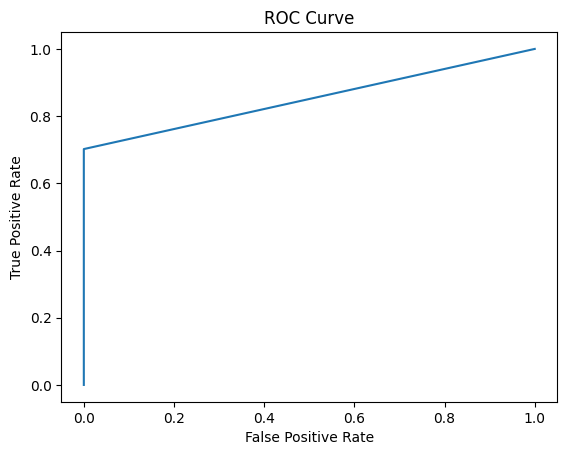

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# Convert the actual rainfall class to binary labels
le = LabelEncoder()
data['actual_rainfall_class_bin'] = le.fit_transform(data['actual_rainfall_class'])
data['rainfall_class_bin'] = le.fit_transform(data['rainfall_class'])

# Calculate the false positive rates (FPR) and true positive rates (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(data['actual_rainfall_class_bin'], data['rainfall_class_bin'])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [33]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC and the corresponding threshold value
auc = roc_auc_score(data['actual_rainfall_class_bin'], data['rainfall_class_bin'])
best_threshold = thresholds[np.argmax(tpr - fpr)]

print('Best threshold:', best_threshold)
print('AUC:', auc)


Best threshold: 1
AUC: 0.8509765625


In [37]:
threshold = 5.0  # set the initial threshold

data['predicted_class'] = data['error'].apply(lambda x: 'Extreme' if x >= threshold else 'Normal')


In [39]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert the categorical labels to numerical labels
data['actual_rainfall_class'] = le.fit_transform(data['actual_rainfall_class'])
data['predicted_class'] = le.transform(data['predicted_class'])


In [48]:
data['actual_rainfall_class']=np.array(data['actual_rainfall_class'])
data['predicted_class']=np.array(data['actual_rainfall_class'])

In [45]:
data['actual_rainfall_class']

0       1
1       1
2       1
3       1
4       1
       ..
2557    1
2558    1
2559    1
2560    1
2561    1
Name: actual_rainfall_class, Length: 2562, dtype: int32

In [49]:
print(type(data['actual_rainfall_class']))
print(type(data['predicted_class']))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(data['actual_rainfall_class'], data['predicted_class'], pos_label='Extreme')


C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\metrics\_ranking.py:758: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(data['actual_rainfall_class'], data['predicted_class'], pos_label='Extreme')



TypeError: 'numpy.float64' object is not callable

In [ ]:
optimal_threshold = thresholds[np.argmax(tpr - fpr)]


In [ ]:
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]


In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Classify the rainfall data into normal and extreme based on the best threshold
data['rainfall_class'] = np.where(data['predicted_rainfall'] > best_threshold, 'Extreme', 'Normal')

# Calculate the accuracy
num_correct = len(data[data['rainfall_class'] == data['actual_rainfall_class']])
num_total = len(data)
accuracy = num_correct / num_total * 100
print('Accuracy: {:.2f}%'.format(accuracy))


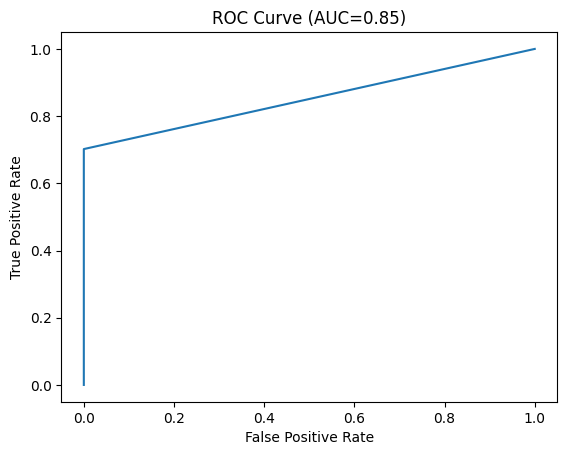

Best threshold value: 1.00


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

# Convert the actual rainfall class to binary labels
le = LabelEncoder()
data['actual_rainfall_class_bin'] = le.fit_transform(data['actual_rainfall_class'])
data['rainfall_class_bin'] = le.fit_transform(data['rainfall_class'])

# Calculate the false positive rates (FPR) and true positive rates (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(data['actual_rainfall_class_bin'], data['rainfall_class_bin'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(data['actual_rainfall_class_bin'], data['rainfall_class_bin'])

# Find the threshold that maximizes the Youden's J statistic (i.e., TPR - FPR)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={auc:.2f})')
plt.show()

# Print the best threshold value
print(f'Best threshold value: {best_threshold:.2f}')


In [ ]:
reconstruction_error = np.mean(np.square(data['error'])

# Define the true labels (0 for normal rainfall, 1 for extreme rainfall)
true_labels = (test_y >= 10).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, reconstruction_error)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = %0.2f)' % auc_score)
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['actual_rainfall_class_encoded'] = label_encoder.fit_transform(data['actual_rainfall_class'])

type(data['actual_rainfall_class_encoded'] )

pandas.core.series.Series

In [69]:
data['actual_rainfall_class_encoded'] = data['actual_rainfall_class_encoded'].astype(int)
type(data['actual_rainfall_class_encoded'] )

pandas.core.series.Series

In [57]:
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(data['actual_rainfall_class_encoded'], data['error'], pos_label='1')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

C:\Users\shine\anaconda3\envs\environment\lib\site-packages\sklearn\metrics\_ranking.py:758: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable

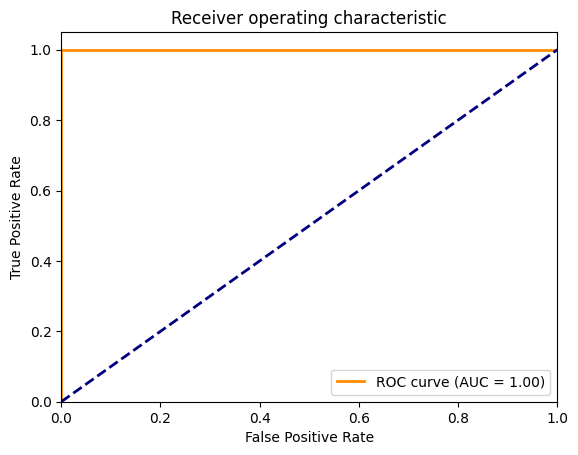

In [75]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Create a binary column indicating whether the actual rainfall was Extreme or not
data['actual_rainfall_binary'] = data['actual_rainfall_class'] == 'Extreme'

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(data['actual_rainfall_binary'], data['error'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [111]:
wrong_predictions = data[data['rainfall_class'] != data['actual_rainfall_class']]

# Print the wrong predictions
print(wrong_predictions)

Empty DataFrame
Columns: [date, windspeed, tpw, rainfall, rainfall_tree, windspeed_tree, tpw_tree, predicted_rainfall, error, rainfall_class, actual_rainfall_class, actual_rainfall_binary]
Index: []


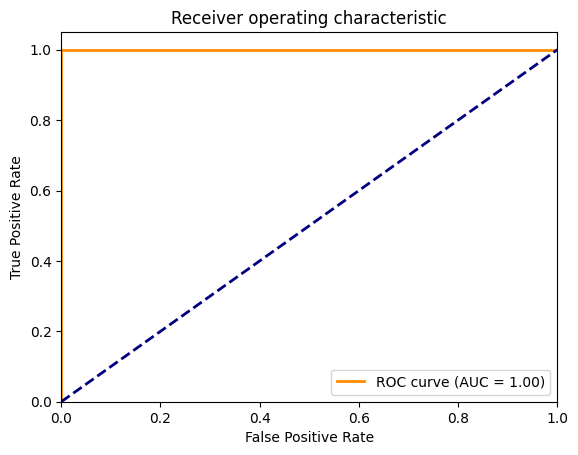

Best threshold: 54.430427920253905


In [119]:
# Create a binary column indicating whether the actual rainfall was Extreme or not
data[''] = (data['rainfall_class'] == 'Extreme') & (data['actual_rainfall_class'] == 'Extreme')
actual_rainfall_binary
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(data['actual_rainfall_binary'], data['error'])

# Calculate TNR
tnr = 1 - fpr

# Calculate Youden's J statistic for each threshold
j_stat = tpr + tnr - 1

# Find the index of the threshold that maximizes J
best_threshold_idx = np.argmax(j_stat)

# Get the best threshold
best_threshold = thresholds[best_threshold_idx]

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Print the best threshold
print("Best threshold:", best_threshold)